# Importing neccessary libraries 

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize

<h2>Loading the Dataset </h2>

In [2]:

(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [3]:

print("Train set shape:", train_X.shape)
print("Train labels shape:", train_y.shape)
print("Test set shape:", test_X.shape)
print("Test labels shape:", test_y.shape)


Train set shape: (60000, 28, 28)
Train labels shape: (60000,)
Test set shape: (10000, 28, 28)
Test labels shape: (10000,)


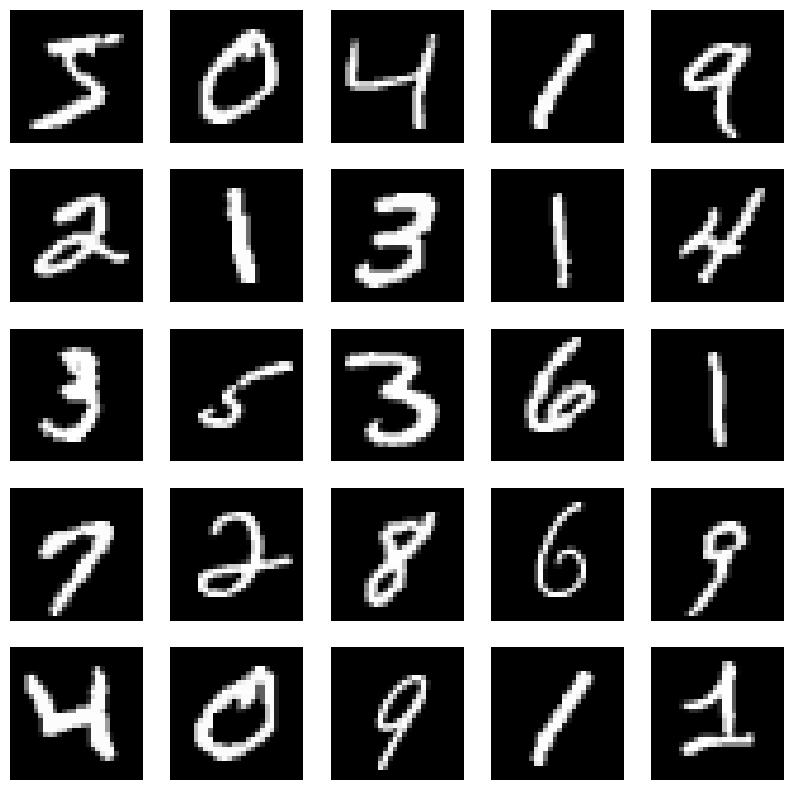

Labels of the sample data: [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1]


In [4]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_X[i], cmap='gray')
    plt.axis('off')
plt.show()

# Display the labels of the sample data
print("Labels of the sample data:", train_y[:25])



## Vizualizing  the class distribution

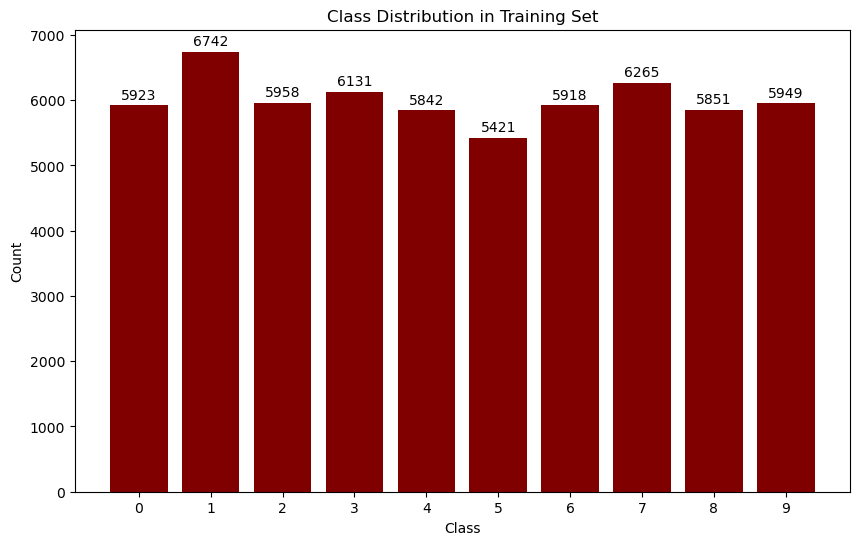

In [5]:

unique, counts = np.unique(train_y, return_counts=True)
class_counts = dict(zip(unique, counts))

# plotting 

plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts.keys(), class_counts.values(), color='maroon')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Training Set')
plt.xticks(list(range(10)))  # Assuming there are 10 classes (digits 0-9)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom')

plt.show()


<h2>Implementing Logistic Regression on MNIST dataset

### We opted for logistic regression as our classification method for the MNIST dataset due to its simplicity and effectiveness in handling multi-class classification tasks like this. Despite its straightforward nature, logistic regression provides a solid foundation for our analysis, allowing us to assess the fundamental patterns in the data before delving into more complex models.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


train_X_flat = train_X.reshape(train_X.shape[0], -1)
test_X_flat = test_X.reshape(test_X.shape[0], -1)

# Normalizing the pixel values to a range between 0 and 1
train_X_flat = train_X_flat / 255.0
test_X_flat = test_X_flat / 255.0
# creating a list for C
C_values = [0.001, 0.01, 0.1, 1.0, 10.0]

# Initializing dictionaries to store accuracies and confusion matrices for each C value
accuracies = {}
conf_matrices = {}

for C in C_values:
    logistic_model = LogisticRegression(max_iter=1000, C=C)
    logistic_model.fit(train_X_flat, train_y)
    
    predicted_labels = logistic_model.predict(test_X_flat)
    accuracy = accuracy_score(test_y, predicted_labels)
    accuracies[C] = accuracy
    
    conf_matrix = confusion_matrix(test_y, predicted_labels)
    conf_matrices[C] = conf_matrix


for C, accuracy in accuracies.items():
    print(f"Accuracy for C={C}: {accuracy}")

# Plotting the accuracies for each value of C
plt.figure(figsize=(10, 6))
plt.plot(list(accuracies.keys()), list(accuracies.values()), marker='o')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for Different Values of Regularization Parameter (C)')
plt.xscale('log')
plt.grid(True)
plt.show()

# Finding the best value of C based on the highest accuracy
best_C = max(accuracies, key=accuracies.get)
print(f"Best value of C: {best_C}")


plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrices[best_C], annot=True, cmap='Reds', fmt='g', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for the Best Logistic Regression Model (C={})'.format(best_C))
plt.show()


### Plotting ROC curves for each class

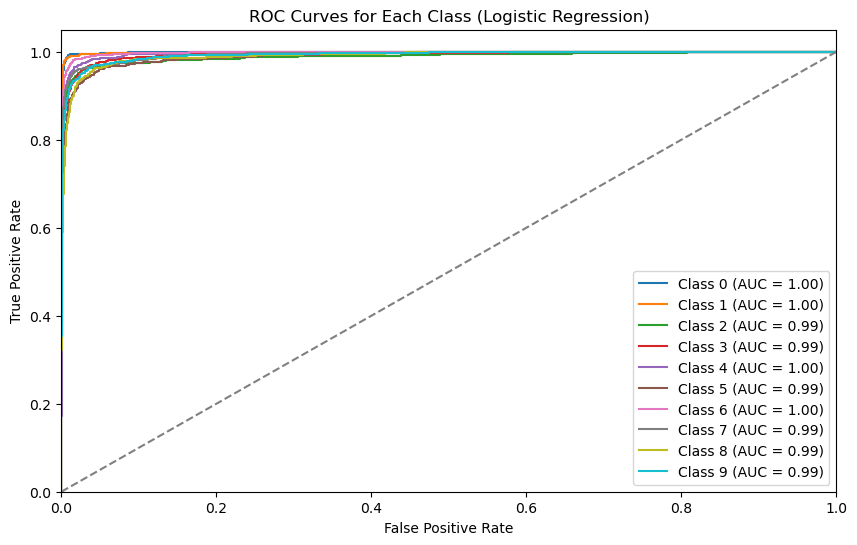

In [48]:
predictions_proba = logistic_model.predict_proba(test_X_flat)

plt.figure(figsize=(10, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(test_y == i, predictions_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()


### Creating Classification Report FOR LOGISTIC REGRESSION 

In [ ]:
logistic_model = LogisticRegression(max_iter=100, C=best_C)
logistic_model.fit(train_X_flat, train_y)

# Evaluate the logistic regression model using classification report
predictions = logistic_model.predict(test_X_flat)
print("\nClassification Report FOR LOGISTIC REGRESSION :")
print(classification_report(test_y, predictions))


# Implementing KNN algorith on MNIST dataset

(60000, 784)
Accuracy for k=3: 0.9705
(60000, 784)
Accuracy for k=5: 0.9688
(60000, 784)
Accuracy for k=7: 0.9694
(60000, 784)
Accuracy for k=9: 0.9659
(60000, 784)
Accuracy for k=11: 0.9668
(60000, 784)
Accuracy for k=13: 0.9653


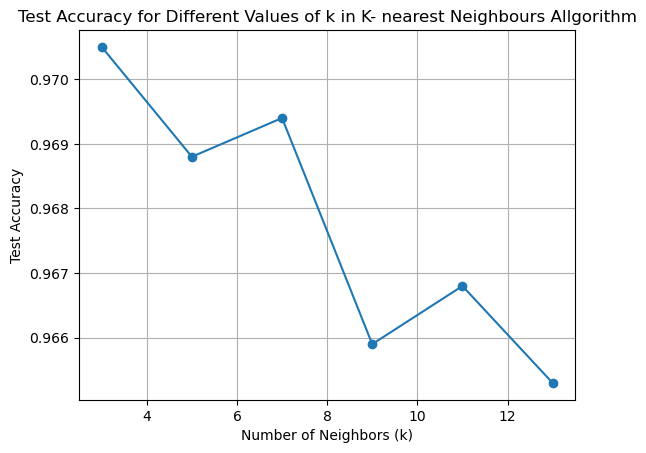

Best value of k: 3


In [14]:
# Flattening the training and testing images
train_X_flat = train_X.reshape(train_X.shape[0], -1)
test_X_flat = test_X.reshape(test_X.shape[0], -1)

# Normalizing the pixel values to a range between 0 and 1
train_X_flat = train_X_flat / 255.0
test_X_flat = test_X_flat / 255.0

# we defined a range of odd k values  from 3 to 10
k_values = list(range(3, 15, 2))  
# Train KNN classifiers with different values of k and evaluate accuracy on the testing set
accuracies = []
for k in k_values:
    
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(train_X_flat, train_y)
    print(train_X_flat.shape)
    
    # Evaluating accuracy on the testing data
    accuracy = knn_classifier.score(test_X_flat, test_y)
    accuracies.append(accuracy)
    print(f"Accuracy for k={k}: {accuracy}")

# Plotting the accuracies for each value of k
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for Different Values of k in K- nearest Neighbours Allgorithm')
plt.grid(True)
plt.show()

best_k = k_values[accuracies.index(max(accuracies))]
print("Best value of k:", best_k)

### Creating Classification Report FOR KNN

In [37]:
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
best_knn_classifier.fit(train_X_flat, train_y)

# Evaluating the best KNN classifier using classification report
predictions = best_knn_classifier.predict(test_X_flat)
print("\nClassification Report FOR KNN:")
print(classification_report(test_y, predictions))


Classification Report FOR KNN:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### plotting KNN ROC Curves for Each Class 

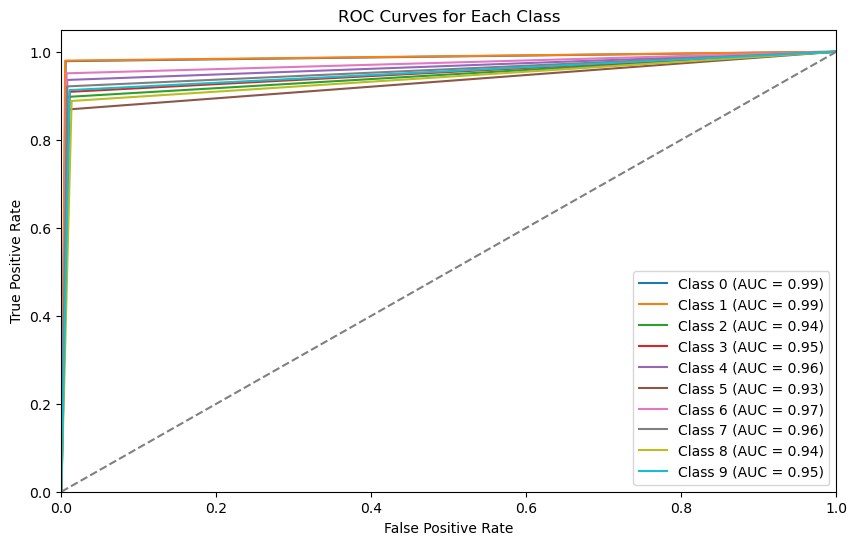

In [26]:

from sklearn.preprocessing import label_binarize

n_classes = 10  # Number of classes
predictions_proba = label_binarize(predictions, classes=list(range(n_classes)))

# Plotting ROC curves for each class
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(test_y == i, predictions_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()


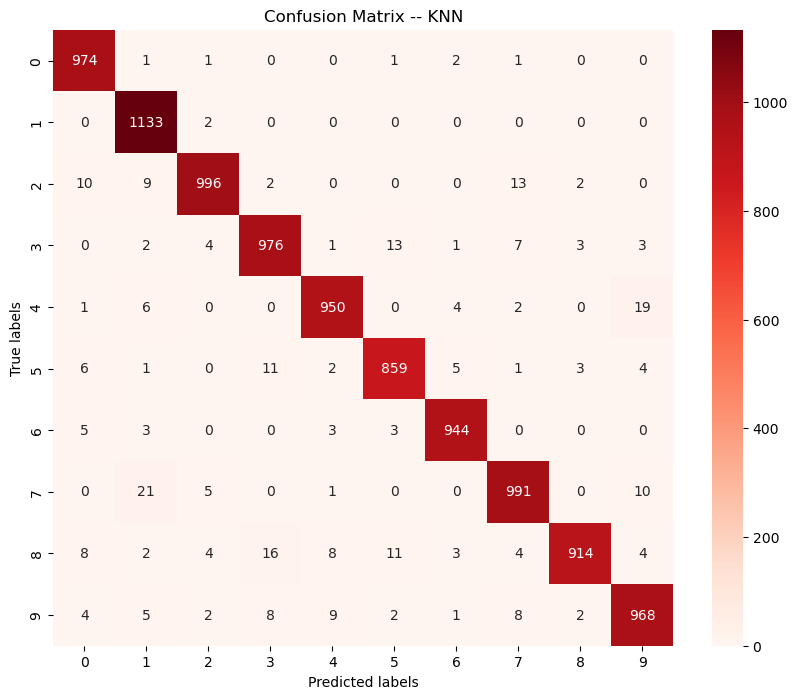

In [25]:
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
best_knn_classifier.fit(train_X_flat, train_y)

predicted_labels = best_knn_classifier.predict(test_X_flat)

# Creating the confusion matrix
conf_matrix = confusion_matrix(test_y, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='g', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix -- KNN')
plt.show()

# implementing CNN

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

## creating method to create cnn model
def create_cnn_model(num_conv_layers, num_filters):
    model = Sequential()
    
    # Adding convolutional layers
    for _ in range(num_conv_layers):
        model.add(Conv2D(num_filters, (3, 3), activation='relu', input_shape=(28, 28, 1)))
        model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    
    # Adding dense layers
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    # Compiling the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Reshaping the flattened data back into image format
train_X_reshaped = train_X.reshape(train_X.shape[0], 28, 28, 1)
test_X_reshaped = test_X.reshape(test_X.shape[0], 28, 28, 1)

Training CNN with 2 convolutional layers and 32 filters...


/Users/HP/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8743 - loss: 1.1639 - val_accuracy: 0.9717 - val_loss: 0.0986
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9779 - loss: 0.0720 - val_accuracy: 0.9793 - val_loss: 0.0675
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9826 - loss: 0.0551 - val_accuracy: 0.9823 - val_loss: 0.0540
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9877 - loss: 0.0409 - val_accuracy: 0.9858 - val_loss: 0.0451
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9894 - loss: 0.0342 - val_accuracy: 0.9845 - val_loss: 0.0536
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9809 - loss: 0.0654
Test accuracy for 2 convolutional layers and 32 filters: 0.984499990940094
Training CNN with 2 convolutional layers and 64 filters...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8805 - loss: 1.0577 - val_accuracy: 0.9786 - val_loss: 0.0679
Epoch 2/5


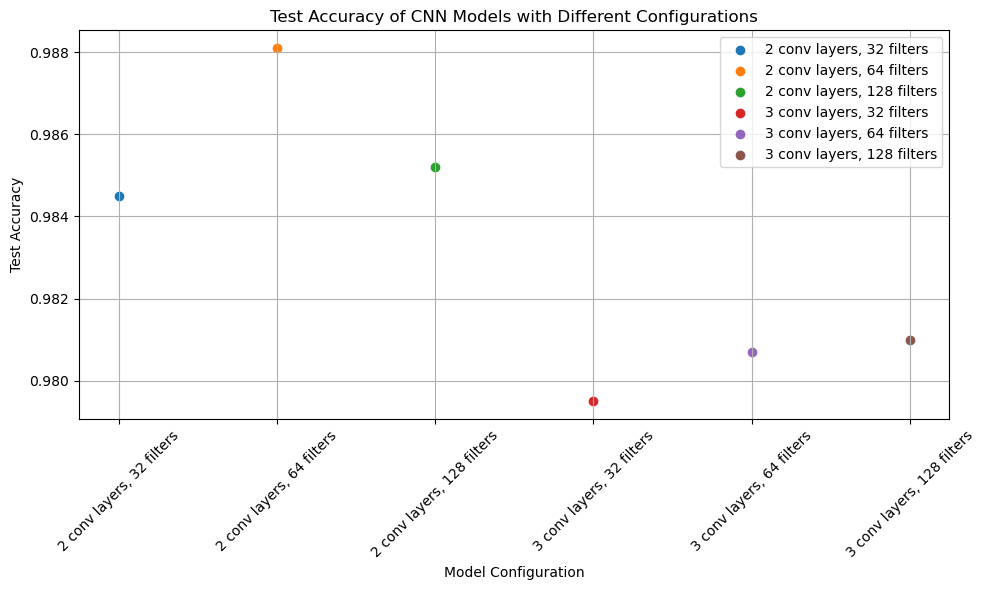

The best model configuration has 2 convolutional layers and 64 filters.


In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define lists to store results
num_conv_layers_list = [2, 3]
num_filters_list = [32, 64, 128]
accuracies = []

# Train and evaluate the CNN models with different configurations
for num_conv_layers in num_conv_layers_list:
    for num_filters in num_filters_list:
        print(f"Training CNN with {num_conv_layers} convolutional layers and {num_filters} filters...")

        # Create CNN model
        cnn_model = create_cnn_model(num_conv_layers, num_filters)

        # Train the model
        cnn_history = cnn_model.fit(train_X_reshaped, train_y, epochs=5, validation_data=(test_X_reshaped, test_y))

        # Evaluate the model
        test_loss, test_acc = cnn_model.evaluate(test_X_reshaped, test_y)
        print(f'Test accuracy for {num_conv_layers} convolutional layers and {num_filters} filters:', test_acc)

        # Store the accuracy
        accuracies.append(test_acc)

# Plot the results
plt.figure(figsize=(10, 6))
index = 0
for num_conv_layers in num_conv_layers_list:
    for num_filters in num_filters_list:
        plt.scatter(index, accuracies[index], label=f'{num_conv_layers} conv layers, {num_filters} filters')
        index += 1

plt.xlabel('Model Configuration')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy of CNN Models with Different Configurations')
plt.xticks(range(len(accuracies)), [f'{num_conv_layers} conv layers, {num_filters} filters' for num_conv_layers in num_conv_layers_list for num_filters in num_filters_list], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Choose the best model configuration
best_index = accuracies.index(max(accuracies))
best_num_conv_layers, best_num_filters = num_conv_layers_list[best_index // len(num_filters_list)], num_filters_list[best_index % len(num_filters_list)]
print(f"The best model configuration has {best_num_conv_layers} convolutional layers and {best_num_filters} filters.")





313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9848 - loss: 0.0733
Test accuracy for 10 epochs: 0.9879999756813049


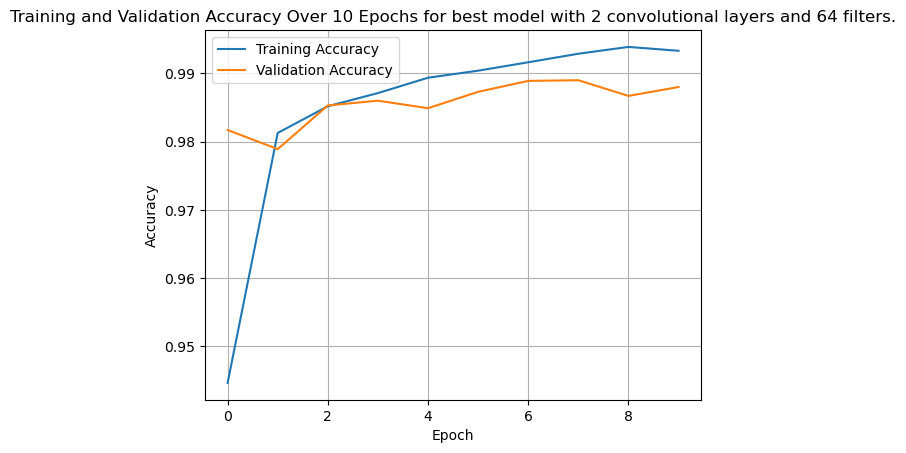

In [29]:
# Define the number of epochs
num_epochs = 10


best_cnn_model = create_cnn_model(best_num_conv_layers, best_num_filters)

best_cnn_history = best_cnn_model.fit(train_X_reshaped, train_y, epochs=num_epochs, validation_data=(test_X_reshaped, test_y), verbose=0)

# Evaluating the model
test_loss, test_acc = best_cnn_model.evaluate(test_X_reshaped, test_y)
print('Test accuracy for {} epochs: {}'.format(num_epochs, test_acc))

# Plotting the training and validation accuracy over epochs
plt.plot(best_cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(best_cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Accuracy Over {} Epochs for best model with {} convolutional layers and {} filters.'.format(num_epochs,best_num_conv_layers, best_num_filters))
plt.show()

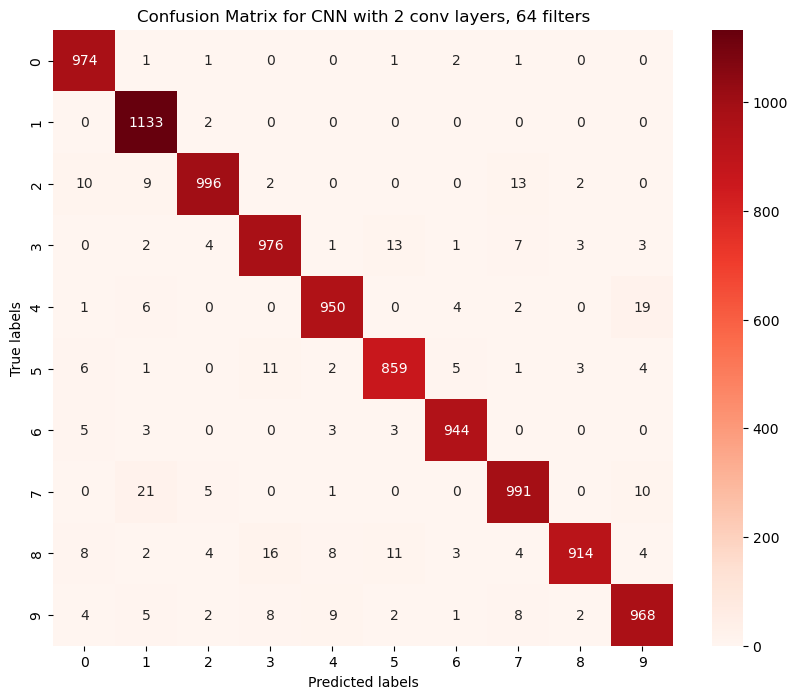

In [32]:
conf_matrix = confusion_matrix(test_y, predicted_labels)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='g', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f'Confusion Matrix for CNN with {best_num_conv_layers} conv layers, {best_num_filters} filters')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


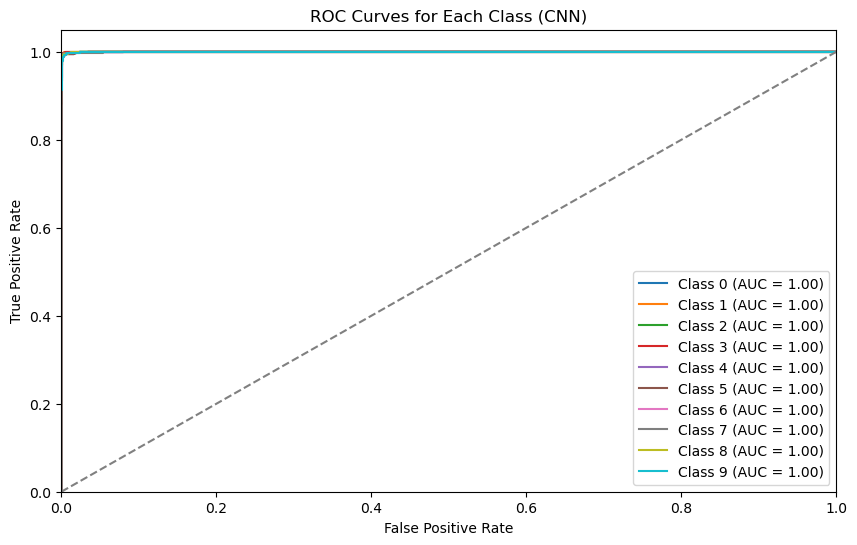

In [40]:
# Using the model to predict probabilities
predicted_labels_proba = best_cnn_model.predict(test_X_reshaped)

# Plotting ROC curves for each class
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(test_y == i, predicted_labels_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class (CNN)')
plt.legend(loc="lower right")
plt.show()


In [36]:
from sklearn.metrics import classification_report

predicted_probabilities = best_cnn_model.predict(test_X_reshaped)


predicted_labels = predicted_probabilities.argmax(axis=1)

report = classification_report(test_y, predicted_labels)

print("Classification Report for best  CNN Model:")
print(report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report for best  CNN Model:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

